In [62]:
import pandas as pd
import geopandas as gpd

import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline

## Local Authorities: Downloaded dataset

https://geoportal.statistics.gov.uk/datasets/local-athority-districts-december-2018-boundaries-gb-bfc

In [17]:
la = gpd.read_file("/Users/jroberts/GitHub/newcastle-boundaries/Local_Athority_Districts_December_2018_Boundaries_GB_BFC/Local_Athority_Districts_December_2018_Boundaries_GB_BFC.shp")

In [18]:
la.head()

,objectid,lad18cd,lad18nm,lad18nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676201,9.355951e+07,71707.162397,"MULTIPOLYGON (((447213.900 537036.104, 447228...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544701,5.388858e+07,43840.876046,"MULTIPOLYGON (((448958.901 521835.695, 449045...."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567501,2.448203e+08,97993.352238,"MULTIPOLYGON (((455752.600 528195.705, 455738...."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556900,2.049622e+08,119581.539702,"MULTIPOLYGON (((444157.002 527956.304, 444165...."
4,5,E06000005,Darlington,None,428029,515648,-1.56835,54.535301,1.974757e+08,107206.282970,"POLYGON ((436388.002 522354.197, 436392.298 52..."


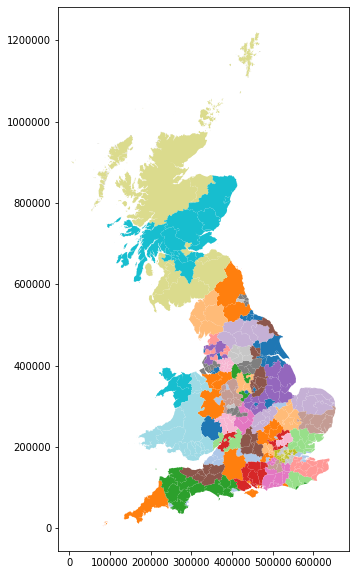

In [19]:
la.plot(cmap='tab20', figsize=(20,10))

## Output Areas: Downloaded dataset
https://geoportal.statistics.gov.uk/datasets/output-area-december-2011-full-clipped-boundaries-in-england-and-wales?geometry=-1.623%2C54.976%2C-1.600%2C54.980

In [20]:
oa = gpd.read_file("/Users/jroberts/GitHub/newcastle-boundaries/Output_Area_December_2011_Full_Clipped_Boundaries_in_England_and_Wales/Output_Area_December_2011_Full_Clipped_Boundaries_in_England_and_Wales.shp")

In [21]:
oa.head()

,objectid,oa11cd,lad11cd,st_areasha,st_lengths,geometry
0,1,E00000001,E09000001,6707.114639,448.117955,"POLYGON ((532303.125 181877.594, 532301.345 18..."
1,2,E00000003,E09000001,4186.859841,341.806167,"POLYGON ((532198.818 181863.087, 532192.305 18..."
2,3,E00000005,E09000001,8736.114423,444.386358,"POLYGON ((532178.979 181764.041, 532180.131 18..."
3,4,E00000007,E09000001,73494.467622,1607.081131,"POLYGON ((532201.292 181668.180, 532205.000 18..."
4,5,E00000010,E09000001,2533.057603,259.046872,"POLYGON ((532127.958 182133.192, 532106.413 18..."


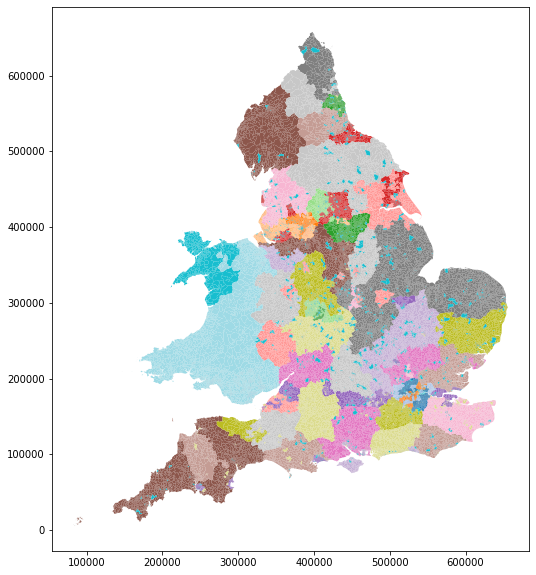

In [22]:
oa.plot(cmap='tab20', figsize=(20,10))

## Newcastle upon Tyne Local Authority

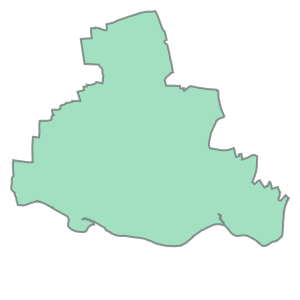

In [47]:
tyne_la = la[la["lad18nm"] == "Newcastle upon Tyne"].iloc[0]
tyne_la["geometry"]

## Output areas intersecting Newcastle Upon Tyne Local Authority

(408071.05655000044, 431673.74444999953, 561994.2654500005, 581808.2255500001)

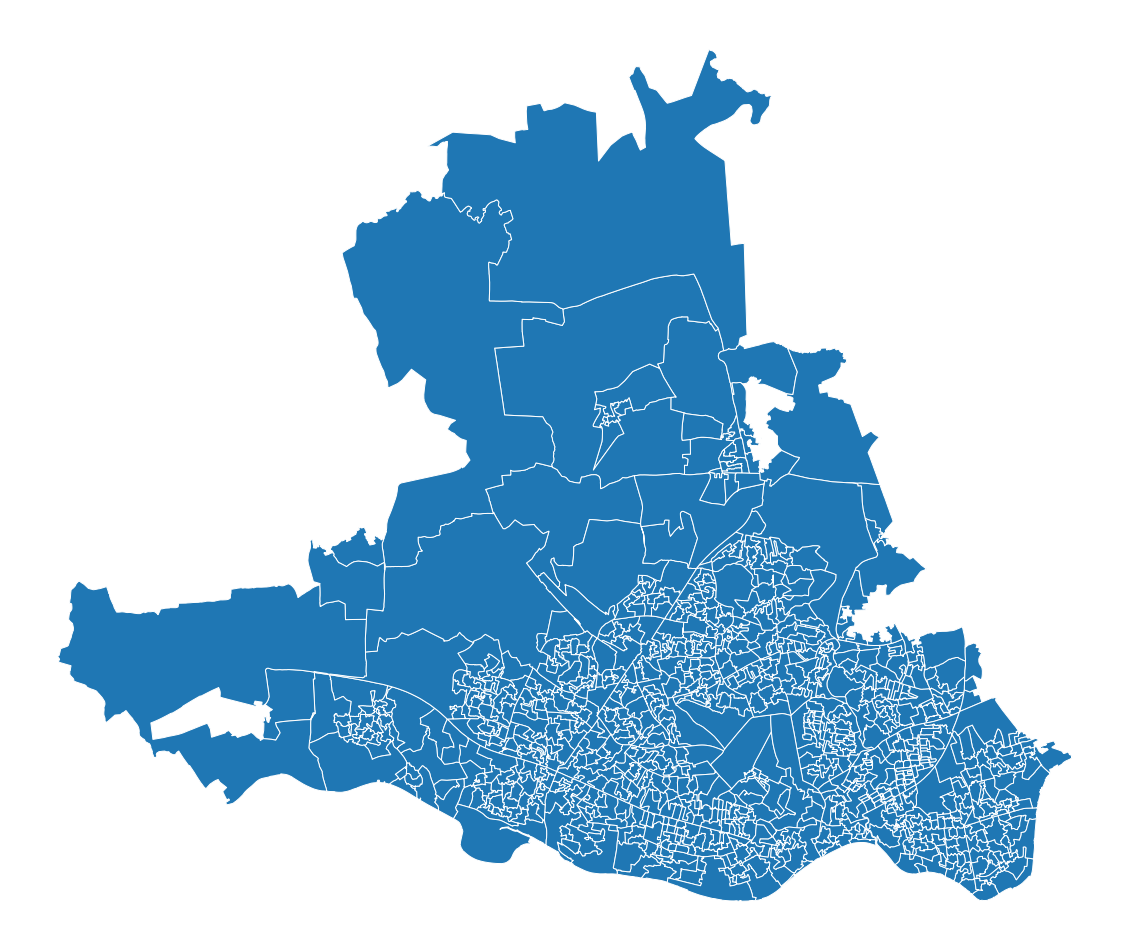

In [59]:
tyne_oa = oa[oa.intersects(tyne_la["geometry"])]

tyne_oa.plot(figsize=(20,20), linewidth=1, edgecolor='white')
plt.axis('off')

Captured output areas compared with local authority boundary:

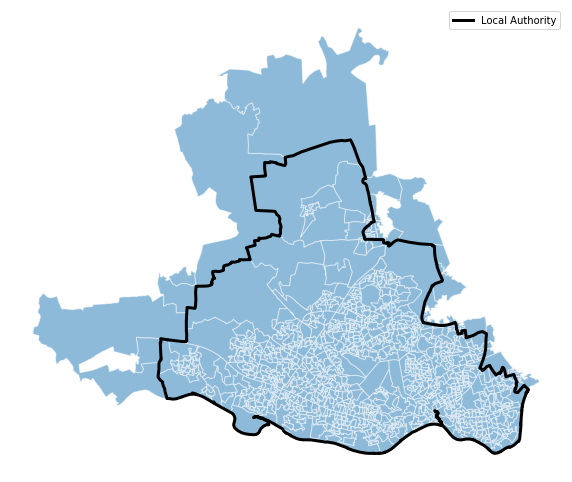

In [61]:
ax = plt.figure(figsize=(10,10)).gca()
x,y = tyne_la["geometry"].exterior.xy
ax.plot(x,y, 'k', linewidth=3)
tyne_oa.plot(alpha=0.5, ax=ax, edgecolor='white')
plt.axis('off')
plt.legend(["Local Authority"])

## With a base map (contextily)

https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html

In [72]:
# convert crs to web mercator (epsg 3857)
print(tyne_oa.crs)
display(tyne_oa.head())

tyne_oa_epsg3857 = tyne_oa.to_crs(epsg=3857)
print(tyne_oa_epsg3857.crs)
display(tyne_oa_epsg3857.head())

{'init': 'epsg:27700'}


,objectid,oa11cd,lad11cd,st_areasha,st_lengths,geometry
40743,40744,E00042042,E08000021,70646.968938,2005.364898,"POLYGON ((421301.772 564928.429, 421301.755 56..."
40744,40745,E00042043,E08000021,46610.454211,1328.957568,"POLYGON ((420572.364 564892.821, 420572.312 56..."
40745,40746,E00042044,E08000021,58693.069365,1663.764939,"POLYGON ((420492.559 564780.806, 420492.590 56..."
40746,40747,E00042045,E08000021,21401.770445,712.782318,"POLYGON ((421543.715 563955.116, 421542.251 56..."
40747,40748,E00042046,E08000021,149085.377199,2866.342992,"POLYGON ((422292.813 563736.716, 422265.374 56..."


/Users/jroberts/anaconda3/envs/newcastle/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


{'init': 'epsg:3857', 'no_defs': True}


,objectid,oa11cd,lad11cd,st_areasha,st_lengths,geometry
40743,40744,E00042042,E08000021,70646.968938,2005.364898,"POLYGON ((-185760.517 7357696.793, -185760.547..."
40744,40745,E00042043,E08000021,46610.454211,1328.957568,"POLYGON ((-187029.397 7357640.638, -187029.508..."
40745,40746,E00042044,E08000021,58693.069365,1663.764939,"POLYGON ((-187169.081 7357446.025, -187169.031..."
40746,40747,E00042045,E08000021,21401.770445,712.782318,"POLYGON ((-185347.826 7355998.415, -185350.358..."
40747,40748,E00042046,E08000021,149085.377199,2866.342992,"POLYGON ((-184047.151 7355611.466, -184094.822..."


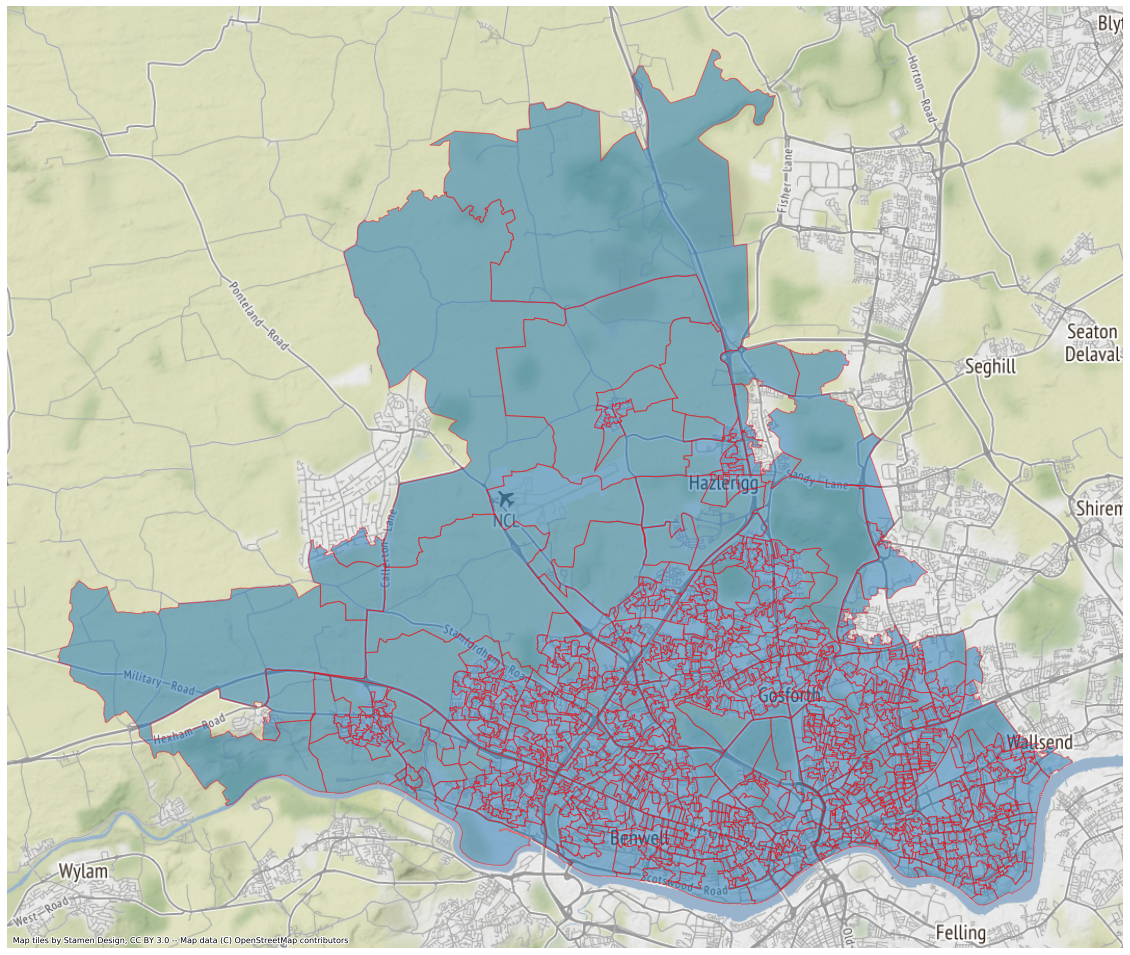

In [82]:
ax = tyne_oa_epsg3857.plot(figsize=(20,20),alpha=0.5, edgecolor="red")
ctx.add_basemap(ax)
ax.set_axis_off()

## Population Centroids
https://geoportal.statistics.gov.uk/datasets/output-areas-december-2011-population-weighted-centroids?geometry=-1.806%2C54.947%2C-1.440%2C55.016

In [ ]:
centroids = pd.read_csv("Output_Areas_December_2011_Population_Weighted_Centroids.csv")
centroids.head()

## Population Estimates
https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/censusoutputareaestimatesinthenortheastregionofengland

In [ ]:
populations = pd.read_csv("Output_Areas_NorthEast_Population_Estimates_2018.csv")
populations["Population"] = populations["Population"].str.replace(",", "").astype(int)
populations.head()

In [ ]:
ne_pop_with_centroids = centroids.merge(populations, left_on='oa11cd', right_on='OA11CD')
ne_pop_with_centroids.drop("OA11CD", axis=1, inplace=True)
ne_pop_with_centroids.head()

In [ ]:
tyne_oa = tyne_oa.merge(ne_pop_with_centroids[["X", "Y", "oa11cd", "Population"]],
                        how="left", on="oa11cd")
tyne_oa.head()

In [ ]:
display(tyne_oa_crs["Population"].describe())

tyne_oa.plot(column="Population",
             cmap="Reds",
             figsize=(10,10),
             legend=True)

In [ ]:
len(tyne_oa)

## OA areas
https://gis.stackexchange.com/questions/218450/getting-polygon-areas-using-geopandas

In [ ]:
tyne_oa_crs = tyne_oa.to_crs(tyne_oa.crs)
tyne_oa_crs["area"] = tyne_oa_crs['geometry'].area/ 10**6
display(tyne_oa_crs.head())

display(tyne_oa_crs["area"].describe())

tyne_oa_crs.plot(column="area",
                 cmap="Reds",
                 figsize=(10,10),
                 legend=True)

In [ ]:
tyne_oa_crs["pop_density"] = tyne_oa_crs["Population"] / tyne_oa_crs["area"]

display(tyne_oa_crs["pop_density"].describe())

tyne_oa_crs.plot(column="pop_density",
                 cmap="Reds",
                 figsize=(10,10),
                 legend=True)

## Quick & Dirty Optimisation

In [ ]:
import numpy as np

In [ ]:
n_sensors = 10

min_x = tyne_oa["X"].min()
max_x = tyne_oa["X"].max()
min_y = tyne_oa["Y"].min()
max_y = tyne_oa["Y"].max()

sensor_x = np.random.randint(min_x, max_x, n_sensors)
sensor_y = np.random.randint(min_y, max_y, n_sensors)

sensors = np.array([sensor_x, sensor_y]).transpose()
pop_centres = np.array([tyne_oa["X"], tyne_oa["Y"]]).transpose()
pop_weights = np.array(tyne_oa["Population"])

In [ ]:
pop_weights

In [ ]:
def distance(x1, y1, x2, y2):
    return (x1 - x2)**2 + (y1 - y2)**2

In [ ]:
print(tyne_oa.crs)

In [ ]:
tyne_oa